In [1]:
import numpy as np

In [3]:
np.__version__

'1.20.3'

In [4]:
#python is dynamically typed language
x = 3
x = "three"

In [5]:
print(x)

three


In [6]:
#heterogeneous lists in Python
L = [True, '2', 1, 4.3]
[type(item) for item in L] #each item is a complete python object, with type info, reference count

[bool, str, int, float]

In [7]:
# Numpy array - fixed type lists (more efficient in storing and manipulating lists, continuous block of data)

array = np.array([1,3,5,7], dtype='int')
array_nested = np.array([range(i, i+3) for i in [1,3,5]])
array_nested

array([[1, 2, 3],
       [3, 4, 5],
       [5, 6, 7]])

In [11]:
#creating specific arrays
np.zeros
np.ones((3,2))
np.random.random((3,3))
np.eye(4) # identity matrix


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

NumPy Array Attributes

In [46]:
np.random.seed(5)
x3 = np.random.randint(10, size=(3,3,5)) #three dimentional array

print('Data type of the array is',x3.dtype)
x3[1,1,3] = 100 #modifying elements

x3[1, ::-1,::-1] #reverse array
x3[1, :, 3]
x3[1, 0] # row access



Data type of the array is int32


array([1, 4, 6, 2, 9])

In [53]:
# array slices return views rather than copies of array data
x3 = np.random.randint(10, size=(3,3,5))
x3_sub = x3[1, 0]
print(x3_sub)
x3_sub[1] = 100
x3
#copy array instead of view
x3_sub_copy = x3[1, 0].copy()
print(x3_sub)
x3_sub_copy[1] = 100
x3

[6 9 2 9 3]
[  6 100   2   9   3]


array([[[  4,   1,   6,   3,   4],
        [  3,   1,   4,   2,   3],
        [  4,   9,   4,   0,   6]],

       [[  6, 100,   2,   9,   3],
        [  0,   8,   8,   9,   7],
        [  4,   8,   6,   8,   0]],

       [[  5,   3,   4,   0,   2],
        [  2,   1,   1,   7,   1],
        [  7,   2,   6,   3,   6]]])

In [60]:
#reshaping
grid = np.arange(1,10).reshape((3,3))
print(grid)
grid = grid.reshape((9,1))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [3]:
# many specialized ufuncs are available in library scipy.special
from scipy import special

x = [1,5,10]
print('beta(x,2)=', special.beta(x,2))

beta(x,2)= [0.5        0.03333333 0.00909091]


In [12]:
#specifying part of the output
x= np.arange(5)
y = np.empty(5)
np.multiply(x,10, out=y[::2])

ValueError: operands could not be broadcast together with shapes (5,) () (3,) 

In [27]:
# reduce repeatedly applies a given operation to the elements until only SINGLE result remains
f = np.arange(1,6)
np.add.reduce(f)
np.multiply.reduce(f)
np.add.accumulate(f)
np.multiply.accumulate(f)

#outer - compute output of all pairs

np.divide.outer(f,f)

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [2.        , 1.        , 0.66666667, 0.5       , 0.4       ],
       [3.        , 1.5       , 1.        , 0.75      , 0.6       ],
       [4.        , 2.        , 1.33333333, 1.        , 0.8       ],
       [5.        , 2.5       , 1.66666667, 1.25      , 1.        ]])

In [5]:
#np is more efficient than built in
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

67.8 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.12 ms ± 73.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
# using methods of the array itselt

big_array.min()

2.1986261067308277e-07

In [15]:
m = np.random.random((3,4))
print(m)
print(m.min(axis=0))
print(m.max(axis=1)) 

[[0.14722789 0.05820428 0.23488625 0.45370428]
 [0.52883278 0.59510833 0.39392307 0.07832833]
 [0.51303217 0.20714753 0.62379019 0.08220135]]
[0.14722789 0.05820428 0.23488625 0.07832833]
[0.45370428 0.59510833 0.62379019]


In [ ]:
#nan safe functions
np.nansum()
np.nanmin()

Broadcasting (vectorizing)
np universal functions can be used to vectorize operations and remove slow Python loops. 
Broadcasting - set of rules for applying binary ufuncs on arrays of different sizes (match array sized)


In [17]:
a = np.arange(5)
b = np.arange(5)[:, np.newaxis]
a + b

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [25]:
import matplotlib.pyplot as plt
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10+y*x)*np.cos(x)
z

array([[-0.83907153, -0.83470697, -0.8216586 , ...,  0.8956708 ,
         0.68617261,  0.41940746],
       [-0.83907153, -0.82902677, -0.8103873 , ...,  0.92522407,
         0.75321348,  0.52508175],
       [-0.83907153, -0.82325668, -0.79876457, ...,  0.96427357,
         0.84172689,  0.66446403],
       ...,
       [-0.83907153, -0.48233077, -0.01646558, ...,  0.96449925,
         0.75196531,  0.41982581],
       [-0.83907153, -0.47324558,  0.00392612, ...,  0.92542163,
         0.68540362,  0.37440839],
       [-0.83907153, -0.46410908,  0.02431613, ...,  0.89579384,
         0.65690314,  0.40107702]])

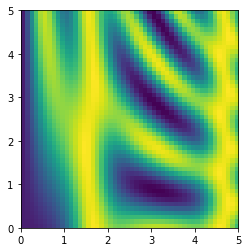

In [36]:
#plt.plot(z)
plt.imshow(z, origin='lower', extent= [0,5,0,5],cmap='viridis')
plt.show()

In [55]:
#Logic functions
x = np.random.randint(1,100,(30,10))
np.sum(x>50, axis=0)

print('Number of values above 50:', np.sum(x>50))
print('Number of values:', np.size(x))

np.size(x[x>50]) #masking operation

Number of values above 50: 143
Number of values: 300


143

In [67]:
# Difference between AND and OR vs & and |
# AND and OR wor on the whole value
# & and | work on the bits or each element

x = 42
y = 2
x_bin = bin(43)
y_bin = bin(2)

x_bin and y_bin

'0b10'

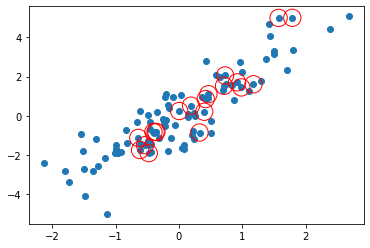

In [79]:
mean = [0,0]

cov = [[1,2],[2,5]]

x = np.random.multivariate_normal(mean, cov, 100)
selection = np.random.choice(x.shape[0], 20, replace=False )
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(x[selection, 0], x[selection, 1], facecolor= 'none', s=300, color= 'red')

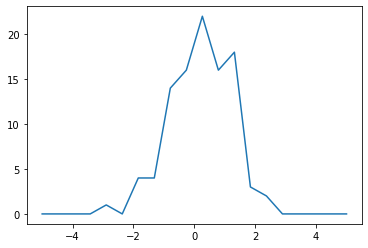

In [104]:
q = np.random.randn(100)
bins = np.linspace(-5,5,20)
counts= np.zeros_like(bins)
i = np.searchsorted(bins,q)
np.add.at(counts, i, 1)
plt.plot(bins, counts)

counts,edges = np.histogram(q, bins)


Big-O notation: 
How the number of operations required for an algorithm scales as the input grows in size. Notation used to compare the performance of algorithms. 

Text(0, 0.5, 'Steps')

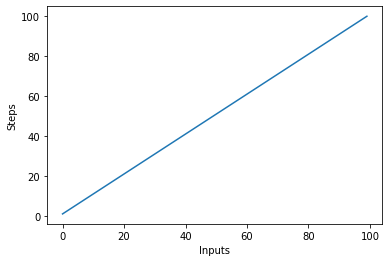

In [16]:
import matplotlib.pyplot as plt
steps = []
def linear(n):
    return 2*n
    
for i in range(1, 100):
    steps.append(linear(i))


def quadratic_algo(items):
    for item in items:
        for item2 in items:
            return item2

steps2 = []
list = [1]

for i in range(2, 101):
    list.append(i)
    steps2.append(quadratic_algo(list))

plt.plot(list)

plt.xlabel('Inputs')
plt.ylabel('Steps')

In [13]:
list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]


K-nearest neighbours in numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
x = np.random.randint(1,100,(100,2))

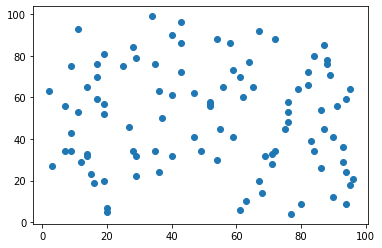

In [11]:
plt.scatter(x[:,0], x[:,1])

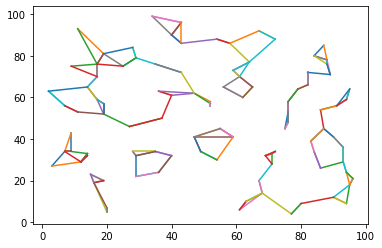

In [54]:
#np.newaxis #adds a new dimention to the array
#x[:,0]- x[:,1]
dist_sq = np.sum((x[:, np.newaxis, :] - x[np.newaxis, :, :]) ** 2, axis=-1)
dist_sq.diagonal()

nearest = np.argsort(dist_sq, axis=1)
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

for i in range(x.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(x[j], x[i])) #color='black')